In [1]:
# from google.colab import drive
# drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# path = "gdrive/My Drive/unrestricted_hcp_freesurfer.csv" 

In [5]:
path = "unrestricted_hcp_freesurfer.csv"

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold,GroupKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [284]:
data_1 =  pd.read_csv(path) 

In [283]:
# data_2 =  pd.read_csv("unrestricted_max.csv") 

# 1. Label encoding

In [221]:
encoded_data, mapping_index = pd.factorize(data_1['Release'])

In [222]:
data_1['Release'] = encoded_data

In [223]:
y1 = data_1['Gender']
X1 = data_1.drop(['Gender',], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, stratify = y1, random_state = 0)

## 1.1 XGB

In [224]:
xgb_cls = xgb.XGBClassifier()
xgb_cls.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [225]:
pred = xgb_cls.predict(X_test)
accuracy_score(pred, y_test)

0.9327354260089686

### GridSearchCV

In [0]:
kfold = StratifiedKFold(n_splits=5, shuffle=True) # 5-fold CV
grid = { 'max_depth':[3,5,10],
    'n_estimators': [100,200,300],
    'learning_rate':[0.02, 0.1, 0.5]}
gs_xgb = GridSearchCV(xgb.XGBClassifier(), grid, n_jobs=-1 , cv=kfold)

In [68]:
gs_xgb.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.02, 0.1, 0.5],
                         'max_depth': [3, 5, 10

In [69]:
gs_xgb.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [70]:
pred = gs_xgb.predict(X_test)
accuracy_score(pred, y_test)

0.9237668161434978

### Cross_val_score

In [372]:
c = cross_val_score(xgb.XGBClassifier(learning_rate=0.5), X1, y1, cv=5)
c, c.mean()

(array([0.91479821, 0.89686099, 0.89686099, 0.90540541, 0.84684685]),
 0.8921544863248899)

In [371]:
c = cross_val_score(xgb.XGBClassifier(learning_rate=0.5), X1, y1, cv=10)
c, c.mean()

(array([0.91071429, 0.89285714, 0.90178571, 0.87387387, 0.90990991,
        0.89189189, 0.89189189, 0.88288288, 0.89189189, 0.87387387]),
 0.892157335907336)

## 1.2 KNN

In [228]:
knn_clf = KNeighborsClassifier()

In [229]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [230]:
pred = knn_clf.predict(X_test)

In [231]:
accuracy_score(pred, y_test)

0.8385650224215246

In [232]:
c = cross_val_score(KNeighborsClassifier(n_neighbors=15), X1, y1, cv=5)
c, c.mean()

(array([0.86098655, 0.84753363, 0.82959641, 0.75675676, 0.78378378]),
 0.8157314264937583)

In [233]:
c = cross_val_score(KNeighborsClassifier(n_neighbors=15), X1, y1, cv=10)
c, c.mean()

(array([0.85714286, 0.82142857, 0.86607143, 0.84684685, 0.82882883,
        0.84684685, 0.76576577, 0.73873874, 0.79279279, 0.83783784]),
 0.8202300514800515)

## 1.3 LogisticRegression

In [234]:
scaler = StandardScaler()

In [235]:
X_t = scaler.fit_transform(X_train)

In [236]:
# X_t = X_train.apply(pd.to_numeric, errors='coerce')
# X_t.fillna(0, inplace=True)

In [237]:
lr_clf = LogisticRegression(max_iter=10000)

In [238]:
Y_t = y_train.replace({'M': 1, 'F': 0})

In [239]:
lr_clf.fit(X_t, Y_t)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [240]:
# X_te = X_test.apply(pd.to_numeric, errors='coerce')
# X_te.fillna(0, inplace=True)

In [241]:
X_te = scaler.fit_transform(X_test)

In [242]:
Y_test = y_test.replace({'M': 1, 'F': 0})

In [243]:
pred = lr_clf.predict(X_te)

In [244]:
accuracy_score(pred, Y_test)

0.9282511210762332

In [245]:
X_scaled = scaler.fit_transform(X1)
y_scaled = y1.replace({'M': 1, 'F': 0})

In [246]:
c = cross_val_score(LogisticRegression(max_iter=10000), X_scaled, y_scaled, cv=5)
c, c.mean()

(array([0.92376682, 0.86995516, 0.9103139 , 0.90990991, 0.90990991]),
 0.9047711388518562)

In [247]:
c = cross_val_score(LogisticRegression(max_iter=10000), X_scaled, y_scaled, cv=10)
c, c.mean()

(array([0.95535714, 0.91964286, 0.85714286, 0.87387387, 0.94594595,
        0.9009009 , 0.92792793, 0.92792793, 0.90990991, 0.92792793]),
 0.9146557271557272)

# 2. One hot encoding

In [307]:
results_1113 ={'xbg':0, "knn":0, 'lr':0}
results_500 ={'xbg':0, "knn":0, 'lr':0}
results_10_1113 ={'xbg':0, "knn":0, 'lr':0}
results_10_500 ={'xbg':0, "knn":0, 'lr':0}

In [7]:
data_1 =  pd.read_csv(path) 

In [8]:
y1 = data_1['Gender']

In [9]:
X1 = data_1.drop(['Gender',], axis = 1)

## 2.1 XGB  

In [10]:
# categorical_attr_names = ['Release']
# data_encoded = pd.get_dummies(X1[categorical_attr_names])

In [11]:
X1 = pd.get_dummies(X1)

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, stratify = y1, random_state = 0)

In [255]:
xgb_cls = xgb.XGBClassifier()

In [256]:
xgb_cls.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [257]:
pred = xgb_cls.predict(X_test)

In [258]:
accuracy_score(pred, y_test)

0.9327354260089686

In [259]:
loo = LeaveOneOut()

In [390]:
c = cross_val_score(xgb.XGBClassifier(learning_rate=0.5), X1, y1, cv=loo)
results_1113['xgb'] = c.mean(), c.std()

In [391]:
c = cross_val_score(xgb.XGBClassifier(learning_rate=0.5), X1[:500], y1[:500], cv=loo)
results_500['xgb'] = c.mean(), c.std()

In [392]:
c = cross_val_score(xgb.XGBClassifier(learning_rate=0.5), X1, y1, cv=10)
results_10_1113['xgb'] = c.mean(), c.std()

In [393]:
c = cross_val_score(xgb.XGBClassifier(learning_rate=0.5), X1[:500], y1[:500], cv=10)
results_10_500['xgb'] = c.mean(), c.std()

## 2.2 KNN

In [374]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)
y_scaled = y1.replace({'M': 1, 'F': 0})

In [260]:
knn_clf = KNeighborsClassifier(n_neighbors=15)
knn_clf.fit(X_train, y_train)
pred = knn_clf.predict(X_test)
accuracy_score(pred, y_test)

0.8654708520179372

In [261]:
c = cross_val_score(KNeighborsClassifier(n_neighbors=15), X1, y1, cv=5)
c, c.mean()

(array([0.86098655, 0.84753363, 0.82959641, 0.75675676, 0.78378378]),
 0.8157314264937583)

In [376]:
c = cross_val_score(KNeighborsClassifier(n_neighbors=45), X1, y1, cv=10)
c, c.mean()

(array([0.84821429, 0.83035714, 0.875     , 0.81081081, 0.81081081,
        0.84684685, 0.78378378, 0.84684685, 0.77477477, 0.85585586]),
 0.8283301158301158)

In [377]:
knn_scores_=[]
for i in range(1,100,1):
    c = cross_val_score(KNeighborsClassifier(n_neighbors=i), X_scaled, y_scaled, cv=10)
    knn_scores_.append(c.mean())
    

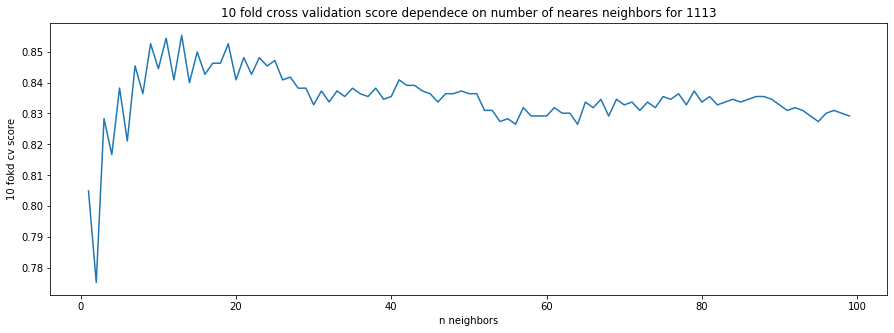

In [378]:
fig = plt.figure(figsize=(15,5))
plt.plot(range(1,100), knn_scores_)
plt.title('10 fold cross validation score dependece on number of neares neighbors for 1113')
plt.xlabel('n neighbors')
plt.ylabel('10 fokd cv score')
plt.show()


In [379]:
knn_scores=[]
for i in range(1,100,1):
    c = cross_val_score(KNeighborsClassifier(n_neighbors=i), X_scaled[:500], y_scaled[:500], cv=10)
    knn_scores.append(c.mean())
    

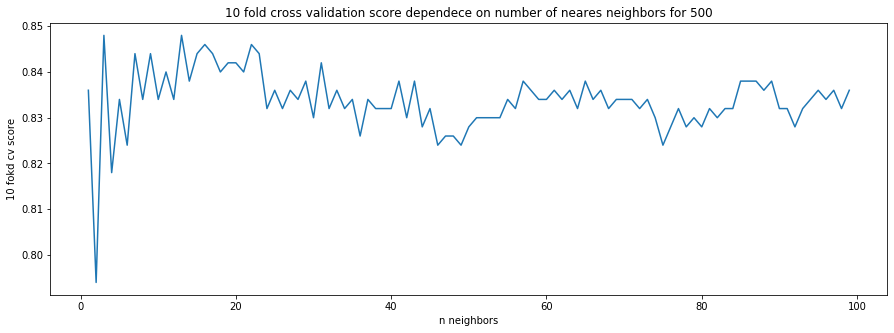

In [380]:
fig = plt.figure(figsize=(15,5))
plt.plot(range(1,100), knn_scores)
plt.title('10 fold cross validation score dependece on number of neares neighbors for 500')
plt.xlabel('n neighbors')
plt.ylabel('10 fokd cv score')
plt.show()

In [382]:
c = cross_val_score(KNeighborsClassifier(n_neighbors=15), X_scaled, y_scaled, cv=loo)
results_1113['knn'] = c.mean(), c.std()

In [383]:
c = cross_val_score(KNeighborsClassifier(n_neighbors=15), X_scaled[:500], y_scaled[:500], cv=loo)
results_500['knn'] = c.mean(), c.std()

In [384]:
c = cross_val_score(KNeighborsClassifier(n_neighbors=15), X_scaled, y_scaled, cv=10)
results_10_1113['knn'] = c.mean(), c.std()

In [385]:
c = cross_val_score(KNeighborsClassifier(n_neighbors=15), X_scaled[:500], y_scaled[:500], cv=10)
results_10_500['knn'] = c.mean(), c.std()

## 2.3 LogisticRegression

In [298]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)
y_scaled = y1.replace({'M': 1, 'F': 0})

In [299]:
X_t = scaler.fit_transform(X_train)
Y_t = y_train.replace({'M': 1, 'F': 0})


In [300]:
lr_clf = LogisticRegression(max_iter=10000)
lr_clf.fit(X_t, Y_t)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [268]:
X_te = scaler.fit_transform(X_test)
Y_te = y_test.replace({'M': 1, 'F': 0})

In [269]:
pred = lr_clf.predict(X_te)
accuracy_score(pred, Y_te)

0.9372197309417041

In [319]:
X_scaled = scaler.fit_transform(X1)
y_scaled = y1.replace({'M': 1, 'F': 0})

In [271]:
c = cross_val_score(LogisticRegression(max_iter=10000), X_scaled, y_scaled, cv=5)
c, c.mean()

(array([0.92825112, 0.87892377, 0.91479821, 0.90990991, 0.91891892]),
 0.9101603845998465)

In [272]:
c = cross_val_score(LogisticRegression(max_iter=10000), X_scaled, y_scaled, cv=10)
c, c.mean()

(array([0.95535714, 0.91964286, 0.86607143, 0.87387387, 0.94594595,
        0.9009009 , 0.92792793, 0.92792793, 0.90990991, 0.92792793]),
 0.9155485842985843)

In [386]:
c = cross_val_score(LogisticRegression(max_iter=10000), X_scaled, y_scaled, cv=loo)
results_1113['lr'] = c.mean(), c.std()

In [387]:
c = cross_val_score(LogisticRegression(max_iter=10000), X_scaled[:500], y_scaled[:500], cv=loo)
results_500['lr'] = c.mean(), c.std()

In [388]:
c = cross_val_score(LogisticRegression(max_iter=10000), X_scaled, y_scaled, cv=10)
results_10_1113['lr'] = c.mean(), c.std()

In [389]:
c = cross_val_score(LogisticRegression(max_iter=10000), X_scaled[:500], y_scaled[:500], cv=10)
results_10_500['lr'] = c.mean(), c.std()

In [322]:
c = cross_val_score(SVC(), X_scaled, y_scaled, cv=10)
c, c.mean()

(array([0.94642857, 0.91964286, 0.89285714, 0.89189189, 0.91891892,
        0.88288288, 0.91891892, 0.89189189, 0.86486486, 0.88288288]),
 0.9011180823680824)

In [352]:
results_1113

{'xbg': 0, 'knn': (0.8310871518418689, 0.3746749229468651), 'lr': 0}

# Results (Leave one out cross validation)

## 1113 people

In [25]:
import plotly.graph_objects as go

In [398]:
fig = go.Figure(data=[go.Table(header=dict(values=['score', 'xgb', 'knn', 'linear regression']),
                 cells=dict(values=[['mean','std'],["%.2f" % results_1113['xgb'][0],"%.2f" % results_1113['xgb'][1]], ["%.2f" % results_1113['knn'][0],"%.2f" % results_1113['knn'][1]], ["%.2f" % results_1113['lr'][0],"%.2f" % results_1113['lr'][1]]]))
                     ])

fig.update_layout(
    title="Leave one out cross validation 1113 people",
)
fig.show()

### 500 people

In [399]:
fig = go.Figure(data=[go.Table(header=dict(values=['score', 'xgb', 'knn', 'linear regression']),
                 cells=dict(values=[['mean','std'],["%.2f" % results_500['xgb'][0],"%.2f" % results_500['xgb'][1]], ["%.2f" % results_500['knn'][0],"%.2f" % results_500['knn'][1]], ["%.2f" % results_500['lr'][0], "%.2f" % results_500['lr'][1]]]))
                     ])
fig.update_layout(
    title="Leave one out cross validation 500 people",
)
fig.show()

# Results (10-fold cross validation)

In [396]:
fig = go.Figure(data=[go.Table(header=dict(values=['score', 'xgb', 'knn', 'linear regression']),
                 cells=dict(values=[['mean','std'],["%.2f" % results_10_1113['xgb'][0],"%.2f" % results_10_1113['xgb'][1]], ["%.2f" % results_10_1113['knn'][0],"%.2f" % results_10_1113['knn'][1]], ["%.2f" % results_10_1113['lr'][0],"%.2f" % results_10_1113['lr'][1]]]))
                     ])
fig.update_layout(
    title="10-fold cross validation 1113 people",
)
fig.show()

In [397]:
fig = go.Figure(data=[go.Table(header=dict(values=['score', 'xgb', 'knn', 'linear regression']),
                 cells=dict(values=[['mean','std'],["%.2f" % results_10_500['xgb'][0],"%.2f" % results_10_500['xgb'][1]], ["%.2f" % results_10_500['knn'][0],"%.2f" % results_10_500['knn'][1]], ["%.2f" % results_10_500['lr'][0],"%.2f" % results_10_500['lr'][1]]]))
                     ])

fig.update_layout(
    title="10-fold cross validation 500 people",
)
fig.show()

# Feature importance 

In [16]:
import matplotlib.pyplot as plt

### XGB

In [2]:
xgb_cls = xgb.XGBClassifier(learning_rate=0.5)

In [12]:
xgb_cls.fit(X1, y1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [13]:
x_im = xgb_cls.feature_importances_


In [14]:
x_im = x_im/x_im.max()

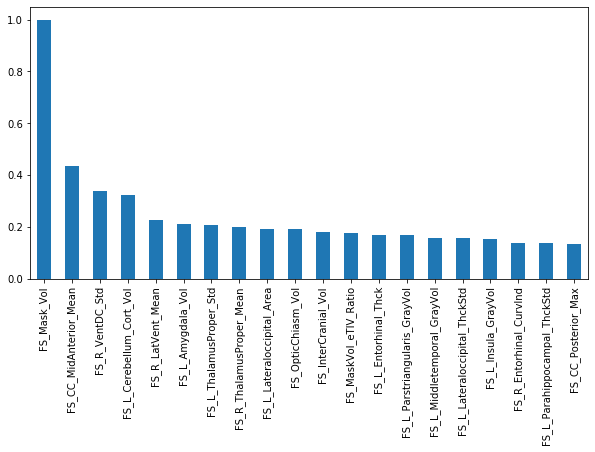

In [23]:
fig = plt.figure(figsize=(10,5))
xgb_feat_importances = pd.Series(x_im, index=X1.columns)
xgb_feat_importances.nlargest(20).plot(kind='bar')
# plt.title('Feature importances XGBoost', size=12)
plt.show()

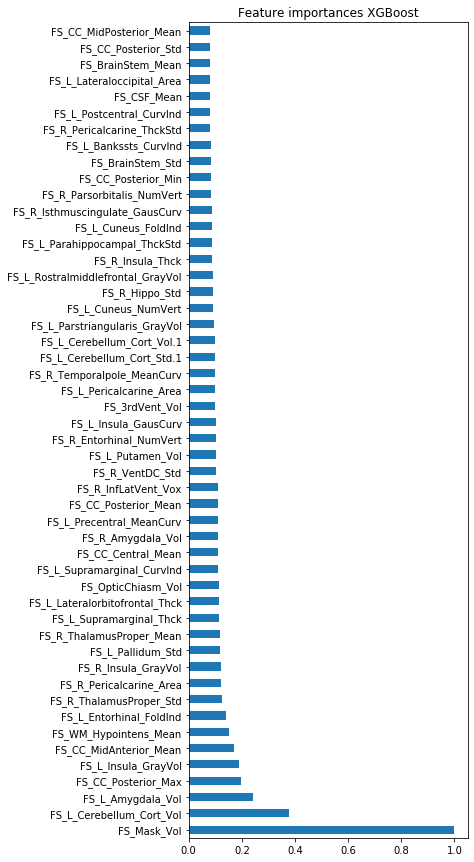

In [364]:
fig = plt.figure(figsize=(5,110))
xgb_feat_importances = pd.Series(x_im, index=X1.columns)
xgb_feat_importances.nlargest(50).plot(kind='bar')
plt.title('Feature importances XGBoost', size=12)
plt.show()

### LogisticRegression

In [19]:
scaler = StandardScaler()

X_t = scaler.fit_transform(X1)
Y_t = y1.replace({'M': 1, 'F': 0})
lr_clf = LogisticRegression(max_iter=10000)
lr_clf.fit(X_t, Y_t)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
l_im = np.abs(lr_clf.coef_[0])/(lr_clf.coef_[0].max())

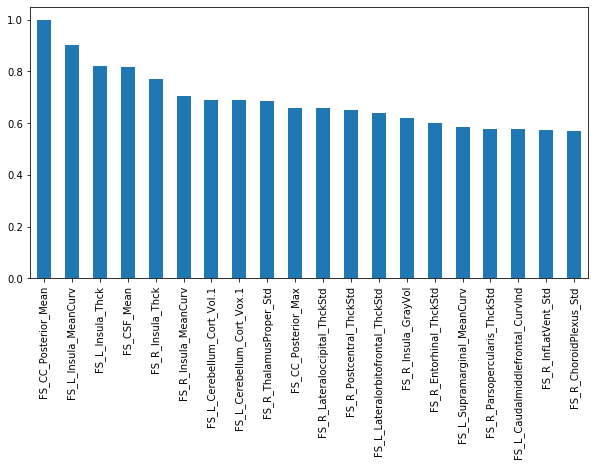

In [24]:
fig = plt.figure(figsize=(10,5))
lr_feat_importances = pd.Series(l_im, index=X1.columns)
lr_feat_importances.nlargest(20).plot(kind='bar')
# plt.title('Feature importances LogisticRegression', size=12)
plt.show()

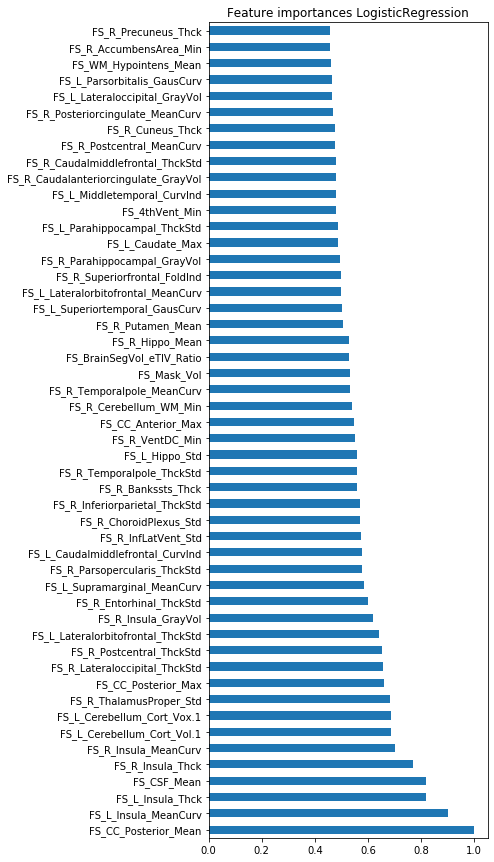

In [366]:
fig = plt.figure(figsize=(5,15))
lr_feat_importances = pd.Series(l_im, index=X1.columns)
lr_feat_importances.nlargest(50).plot(kind='barh')
plt.title('Feature importances LogisticRegression', size=12)
plt.show()

In [188]:
x_imp_df = pd.DataFrame(xgb_feat_importances.reset_index().sort_values(by=0 ,ascending=False))

In [189]:
x_imp_df.columns = ['Region_name', 'Importace']

In [190]:
x_imp_df

,Region_name,Importace
16,FS_Mask_Vol,1.000000
25,FS_L_Cerebellum_Cort_Vol,0.378065
34,FS_L_Amygdala_Vol,0.240250
311,FS_CC_Posterior_Max,0.195672
561,FS_L_Insula_GrayVol,0.188290
...,...,...
374,FS_R_Parsopercularis_Thck,0.000000
375,FS_R_Parsorbitalis_Thck,0.000000
376,FS_R_Parstriangularis_Thck,0.000000
377,FS_R_Pericalcarine_Thck,0.000000


In [208]:
x_imp_df.to_csv('xgb_importance.csv')

In [195]:
lr_imp_df = pd.DataFrame(lr_feat_importances.reset_index().sort_values(by=0 ,ascending=False))

In [197]:
lr_imp_df.columns = ['Region_name', 'Importace']

In [198]:
lr_imp_df

,Region_name,Importace
185,FS_CC_Posterior_Mean,1.000000
697,FS_L_Insula_MeanCurv,0.902701
357,FS_L_Insula_Thck,0.819253
133,FS_CSF_Mean,0.816876
391,FS_R_Insula_Thck,0.770114
...,...,...
300,FS_L_Non-WM_Hypointens_Range,0.000000
299,FS_R_WM_Hypointens_Max,0.000000
298,FS_R_WM_Hypointens_Min,0.000000
102,FS_R_Non-WM_Hypointens_Vox,0.000000


In [207]:
lr_imp_df.to_csv('lin_reg_importance.csv')

In [218]:
pd.read_csv('lin_reg_importance.csv') 

,Unnamed: 0,Region_name,Importace
0,185,FS_CC_Posterior_Mean,1.000000
1,697,FS_L_Insula_MeanCurv,0.902701
2,357,FS_L_Insula_Thck,0.819253
3,133,FS_CSF_Mean,0.816876
4,391,FS_R_Insula_Thck,0.770114
...,...,...,...
938,300,FS_L_Non-WM_Hypointens_Range,0.000000
939,299,FS_R_WM_Hypointens_Max,0.000000
940,298,FS_R_WM_Hypointens_Min,0.000000
941,102,FS_R_Non-WM_Hypointens_Vox,0.000000
